In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
merged_dir = "../../../data/merged"
image_dir = "../../../images/kMeans"

In [24]:
fire_file_path = os.path.join(merged_dir, "fire_land_elev_soil_climate.parquet")
data = pd.read_parquet(fire_file_path)
X = data.drop(columns=['fire','longitude', 'latitude'])
y = data['fire']

In [25]:
# use one hot encoding on LCCCode
X = pd.get_dummies(X, columns=['LCCCode'], drop_first=True)
# Check dtypes again
print(X.dtypes)
# check nan
print(X.isna().sum())

elevation                                  int64
COARSE                                   float64
SAND                                     float64
CLAY                                     float64
TCARBON_EQ                               float64
PH_WATER                                 float64
TOTAL_N                                  float64
CN_RATIO                                 float64
CEC_SOIL                                 float64
ESP                                      float64
GYPSUM                                   float64
prec_median_autumn                       float64
prec_median_spring                       float64
prec_median_summer                       float64
prec_median_winter                       float64
tmin_median_autumn                       float64
tmin_median_spring                       float64
tmin_median_summer                       float64
tmin_median_winter                       float64
tmax_median_autumn                       float64
tmax_median_spring  

In [ ]:
k_values = range(2, 16)
scalers = {
    "none": None,
    "standard": StandardScaler(),
    "robust": RobustScaler()
}


In [ ]:
from sklearn.preprocessing import PowerTransformer

results = []

# Define Yeo-Johnson transformer once
pt = PowerTransformer(method='yeo-johnson')

for scaler_name, scaler in scalers.items():
    for use_pt in [True, False]:   # replace log_flag with use_pt
        # ---- preprocessing ----
        X_proc = X.copy().astype(float)

        # Apply Yeo-Johnson if requested
        if use_pt:
            X_proc = pt.fit_transform(X_proc)

        # Apply scaler if requested
        if scaler is not None:
            X_proc = scaler.fit_transform(X_proc)

        # ---- KMeans over k ----
        for k in k_values:
            km = KMeans(
                n_clusters=k,
                n_init=10,
                max_iter=300,
                random_state=42
            )

            labels = km.fit_predict(X_proc)
            print(f"Completed KMeans for k={k}, scaler={scaler_name}, yeo-johnson={use_pt}")

            results.append({
                "k": k,
                "scaler": scaler_name,
                "yeo_johnson": use_pt,
                "inertia": km.inertia_,
                "silhouette": silhouette_score(X_proc, labels),
                "calinski_harabasz": calinski_harabasz_score(X_proc, labels),
                "davies_bouldin": davies_bouldin_score(X_proc, labels)
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("silhouette", ascending=False).reset_index(drop=True)
print("Top 10 configurations:")
print(results_df.head(10))


c:\Users\T14s\anaconda3\envs\dm-env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Completed KMeans for k=2, scaler=none, yeo-johnson=True
Completed KMeans for k=3, scaler=none, yeo-johnson=True
Completed KMeans for k=4, scaler=none, yeo-johnson=True
Completed KMeans for k=5, scaler=none, yeo-johnson=True
Completed KMeans for k=6, scaler=none, yeo-johnson=True
Completed KMeans for k=7, scaler=none, yeo-johnson=True
Completed KMeans for k=8, scaler=none, yeo-johnson=True
Completed KMeans for k=9, scaler=none, yeo-johnson=True
Completed KMeans for k=10, scaler=none, yeo-johnson=True
Completed KMeans for k=11, scaler=none, yeo-johnson=True
Completed KMeans for k=12, scaler=none, yeo-johnson=True
Completed KMeans for k=13, scaler=none, yeo-johnson=True
Completed KMeans for k=14, scaler=none, yeo-johnson=True
Completed KMeans for k=15, scaler=none, yeo-johnson=True
Completed KMeans for k=2, scaler=none, yeo-johnson=False
Completed KMeans for k=3, scaler=none, yeo-johnson=False
Completed KMeans for k=4, scaler=none, yeo-johnson=False
Completed KMeans for k=5, scaler=none, 

In [28]:
results_df = pd.DataFrame(results)

# Sort by silhouette (best clustering first)
results_df = results_df.sort_values(
    by="silhouette", ascending=False
).reset_index(drop=True)

print("Top 10 configurations:")
print(results_df.head(10))
results_df.to_csv(os.path.join(image_dir, "kmeans_clustering_results.csv"), index=False)

Top 10 configurations:
   k  scaler  yeo_johnson       inertia  silhouette  calinski_harabasz  \
0  2  robust        False  2.220124e+06    0.808146       74637.743487   
1  2    none        False  1.688046e+09    0.659669      145073.151426   
2  3    none        False  8.296338e+08    0.599981      169463.245236   
3  4    none        False  5.110826e+08    0.563650      192173.210737   
4  3  robust        False  1.667388e+06    0.553135       56698.031391   
5  5    none        False  3.809410e+08    0.532882      196976.634605   
6  6    none        False  2.952145e+08    0.503840      205793.208446   
7  4  robust        False  1.174739e+06    0.470454       59560.268815   
8  7    none        False  2.438428e+08    0.456831      209102.335831   
9  8    none        False  2.082084e+08    0.443120      210934.102003   

   davies_bouldin  
0        0.330342  
1        0.459801  
2        0.531681  
3        0.548506  
4        0.602559  
5        0.594969  
6        0.632555  
7 

In [29]:
best_row = results_df.iloc[0]
print("Best configuration:")
print(best_row)


Best configuration:
k                                 2
scaler                       robust
yeo_johnson                   False
inertia              2220123.692424
silhouette                 0.808146
calinski_harabasz      74637.743487
davies_bouldin             0.330342
Name: 0, dtype: object


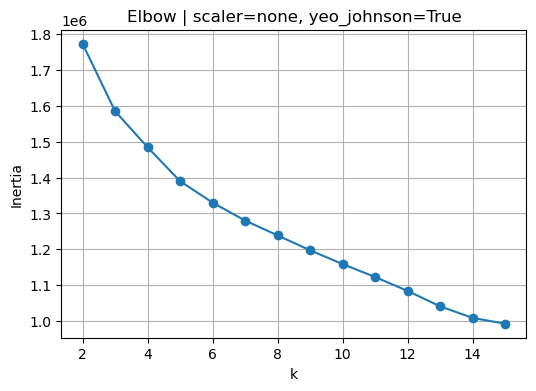

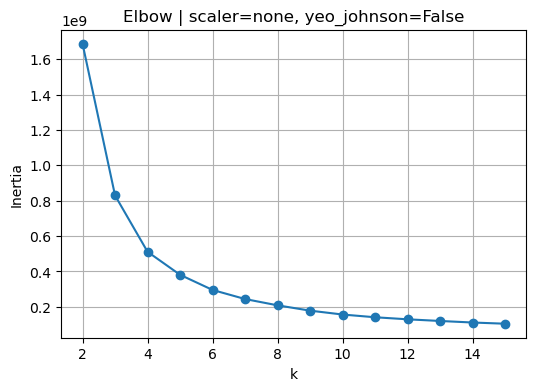

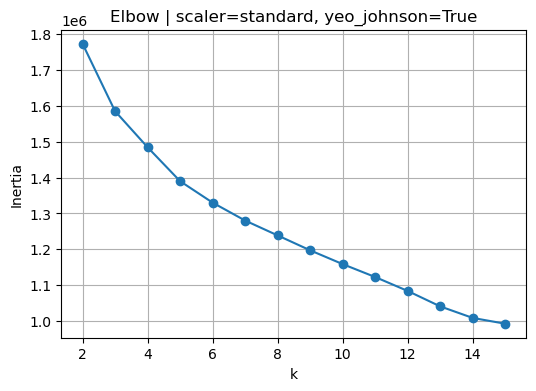

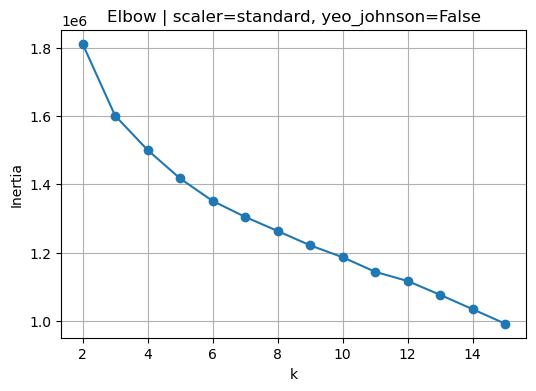

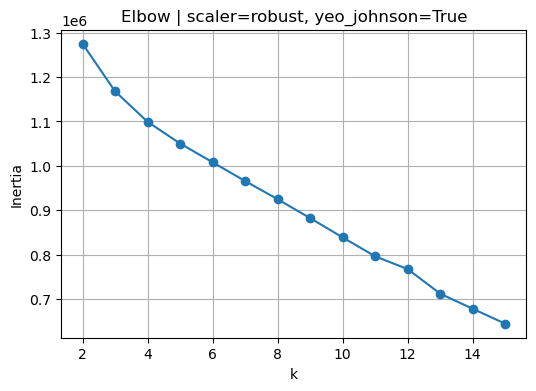

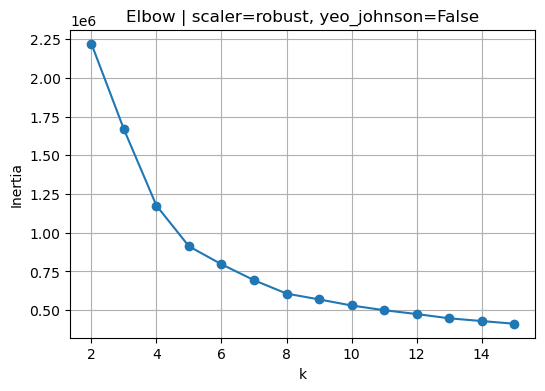

In [31]:
for scaler_name in scalers.keys():
    for pt_flag in [True, False]:
        subset = results_df[
            (results_df["scaler"] == scaler_name) &
            (results_df["yeo_johnson"] == pt_flag)
        ].sort_values("k")

        plt.figure(figsize=(6,4))
        plt.plot(subset["k"], subset["inertia"], marker="o")
        plt.title(f"Elbow | scaler={scaler_name}, yeo_johnson={pt_flag}")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.grid(True)
        plt.show()

In [32]:
# Extract best configuration
best_row = results_df.iloc[0]
best_k = best_row['k']
best_scaler_name = best_row['scaler']
best_yeo_johnson = best_row['yeo_johnson']

# Preprocess X
X_proc = X.copy()
if best_yeo_johnson:
    pt = PowerTransformer(method='yeo-johnson')
    X_proc = pt.fit_transform(X_proc)

scaler_dict = {
    "none": None,
    "standard": StandardScaler(),
    "robust": RobustScaler()
}
scaler = scaler_dict[best_scaler_name]
if scaler is not None:
    X_proc = scaler.fit_transform(X_proc)

# Fit KMeans
km_final = KMeans(n_clusters=best_k, n_init=10, max_iter=300, random_state=42)
labels = km_final.fit_predict(X_proc)

# Add labels to original dataframe for plotting
data_plot = data.copy()
data_plot['cluster'] = labels


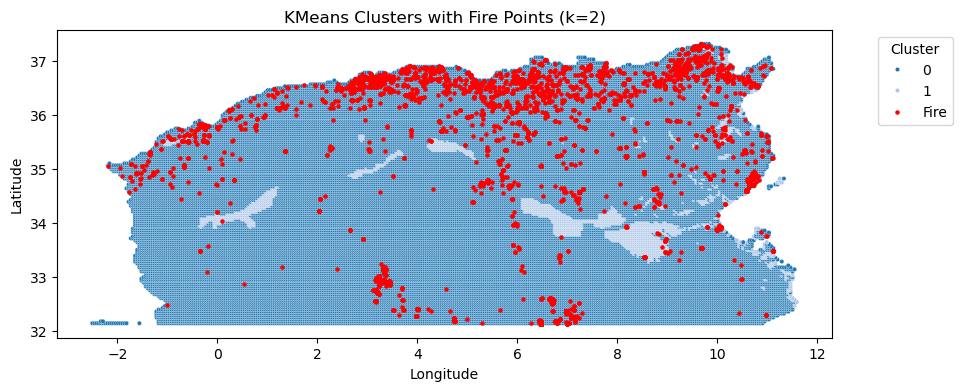

In [37]:
plt.figure(figsize=(10, 4))

# Plot clusters
sns.scatterplot(
    x='longitude', y='latitude',
    hue='cluster',
    palette='tab20',
    data=data_plot,
    legend='full',
    s=10
)

# Overlay fire points as small red dots
fire_points = data_plot[data_plot['fire'] > 0]  # only fire locations
plt.scatter(
    fire_points['longitude'],
    fire_points['latitude'],
    color='red',
    s=5,  # smaller size for fire points
    label='Fire'
)

plt.title(f"KMeans Clusters with Fire Points (k={best_k})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


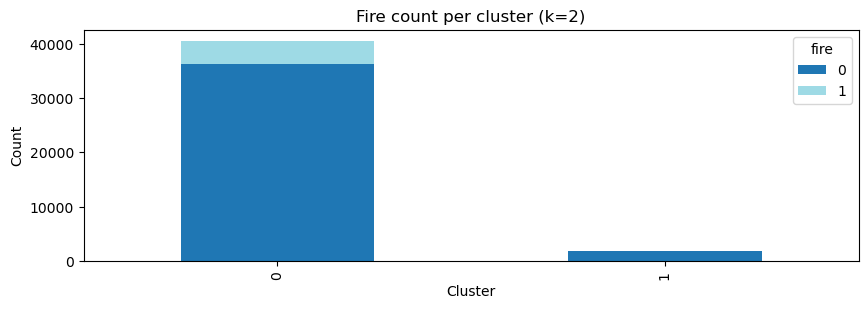

In [36]:
fire_counts = data_plot.groupby('cluster')['fire'].value_counts().unstack(fill_value=0)
fire_counts.plot(kind='bar', stacked=True, figsize=(10,3), colormap='tab20')
plt.title(f"Fire count per cluster (k={best_k})")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


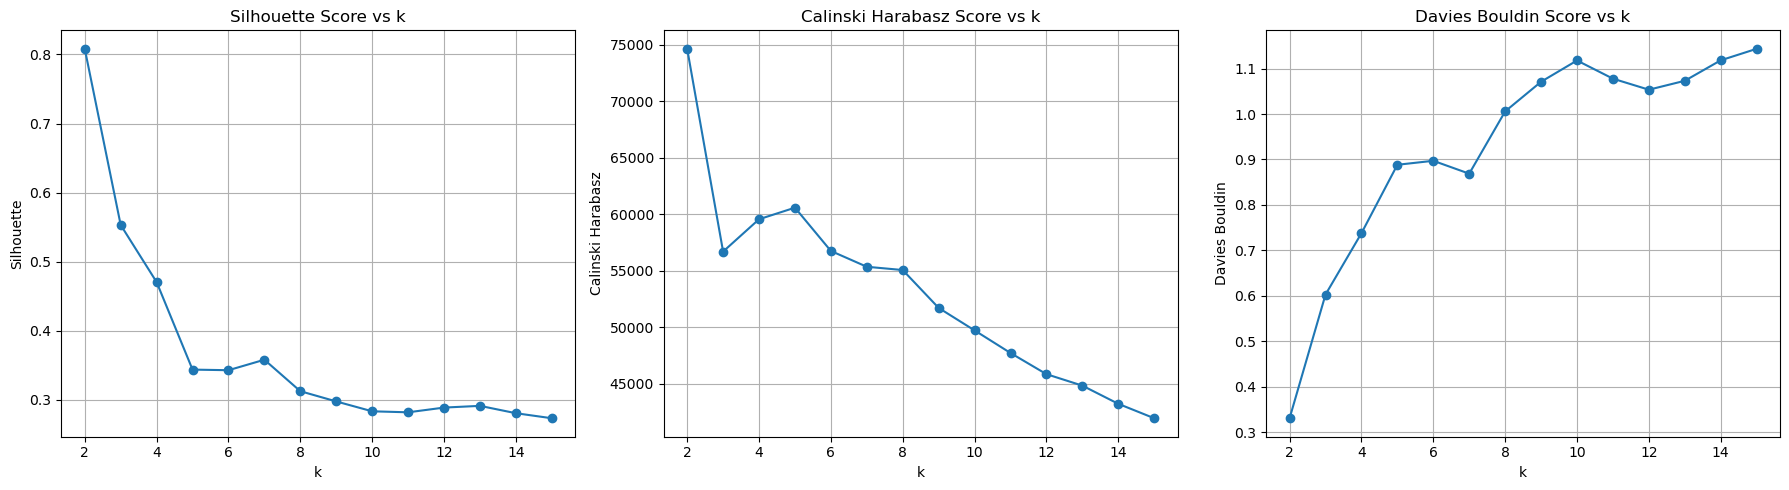

In [47]:
# plot scores by k for robust sclaer and no yeo-johnson in 3 subplots in one line
lines = results_df[
    (results_df["scaler"] == "robust") & (results_df["yeo_johnson"] == False)
]
# sort by k
lines = lines.sort_values("k")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, score_name in enumerate(['silhouette', 'calinski_harabasz', 'davies_bouldin']):
    axs[i].plot(lines['k'], lines[score_name], marker='o')
    axs[i].set_title(f"{score_name.replace('_', ' ').title()} Score vs k")
    axs[i].set_xlabel("k")
    axs[i].set_ylabel(score_name.replace('_', ' ').title())
    axs[i].grid(True)
plt.tight_layout()
save_path = os.path.join(image_dir, "kmeans_scores_by_k.png")
plt.savefig(save_path)
plt.show()


In [54]:
# Extract best configuration
best_row = results_df.iloc[0]
best_k = 4
best_scaler_name = best_row['scaler']
best_yeo_johnson = best_row['yeo_johnson']

# Preprocess X
X_proc = X.copy()
if best_yeo_johnson:
    pt = PowerTransformer(method='yeo-johnson')
    X_proc = pt.fit_transform(X_proc)

scaler_dict = {
    "none": None,
    "standard": StandardScaler(),
    "robust": RobustScaler()
}
scaler = scaler_dict[best_scaler_name]
if scaler is not None:
    X_proc = scaler.fit_transform(X_proc)

# Fit KMeans
km_final = KMeans(n_clusters=best_k, n_init=10, max_iter=300, random_state=42)
labels = km_final.fit_predict(X_proc)

# Add labels to original dataframe for plotting
data_plot = data.copy()
data_plot['cluster'] = labels


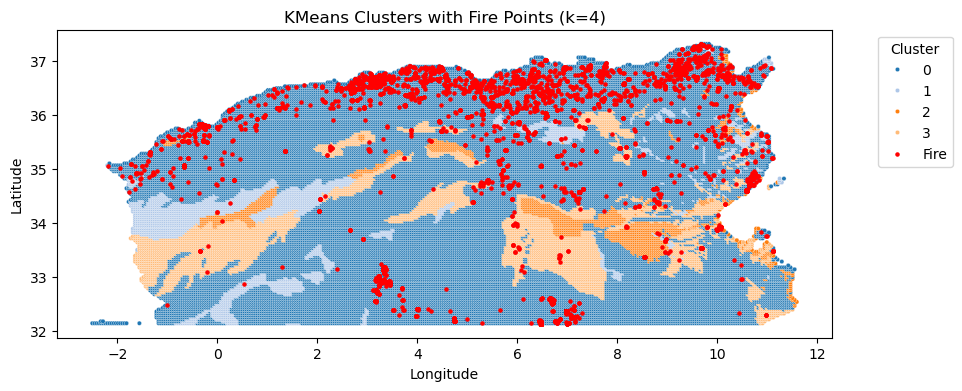

In [55]:
plt.figure(figsize=(10, 4))

# Plot clusters
sns.scatterplot(
    x='longitude', y='latitude',
    hue='cluster',
    palette='tab20',
    data=data_plot,
    legend='full',
    s=10
)

# Overlay fire points as small red dots
fire_points = data_plot[data_plot['fire'] > 0]  # only fire locations
plt.scatter(
    fire_points['longitude'],
    fire_points['latitude'],
    color='red',
    s=5,  # smaller size for fire points
    label='Fire'
)

plt.title(f"KMeans Clusters with Fire Points (k={best_k})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(image_dir, f"kmeans_clusters_with_fire_points_{best_k}.png"))
plt.show()


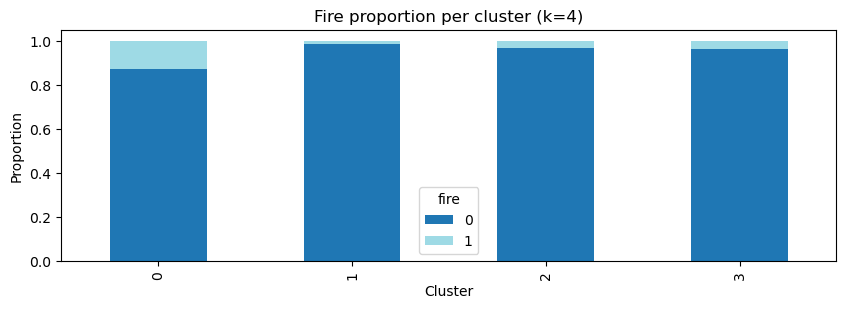

In [56]:
fire_counts = data_plot.groupby('cluster')['fire'].value_counts(normalize=True).unstack(fill_value=0)
fire_counts.plot(kind='bar', stacked=True, figsize=(10,3), colormap='tab20')
plt.title(f"Fire proportion per cluster (k={best_k})")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.savefig(os.path.join(image_dir, f"fire_proportion_per_cluster_{best_k}.png"))
plt.show()
